# <font color=green> Global Warming Science</font>
#### https://courses.seas.harvard.edu/climate/eli/Courses/EPS101/

XX

# Introducing python! and other prerequisites

### <font color=red> Please use the template below to answer the workshop questions. "XX" indicates places where you need to complete/write code or add a discussion.</font>

## Exercise: double-click the text in the cell above to open it, add your name as a subtitle above using two hashtags instead of the XX, shift-enter to recompile.
</font>

## First, import needed libraries, introducing "name spaces":

In [1]:
# This is a code cell. you need to place the cursor in it, and press shift-enter to run it.
# *Do the same for all code and documentation (markdown) cells below*

import numpy as np               # A library for all numerical caclulations
import matplotlib.pyplot as plt  # for plotting
import pickle                    # for extracting stored variables

print('I just ran my first Jupyter notebook cell!')

I just ran my first Jupyter notebook cell!


## <font color="red">  Exercise: printing</font>
set a variable:

myname='XX your name here'
    
print("my name is ",myname)
</font>

In [2]:
# insert your code below this line; note that these two lines are a comment in a
# code cell (they starts with #)

myname='Halldór'

print("my name is ",myname)

my name is  Halldór


### <font color="red">Exercise: creating a markdown cell with an equation.</font>
add a cell below this point by clicking + on the menu bar;
    
change the cell type to markdown
    
insert a title using hashtag(s)
    
insert an equation, e.g., $E=mc^2$
    
change the color of the equation only to blue, with everything else in green
    
run the cell.

XX insert new markdown cell below this point.

## My Equation
<font color="green">This is an equation: </font><font color="blue">$E=mc^2$</font>

XX insert new markdown cell below this point.


## A for loop: reading a time series data and printing the data values

In [5]:
# load data:
# ----------
# load the PDI data from a pickle file to variables
import requests

url = 'https://github.com/gagnagaman/Tziperman/raw/main/introduction_python_variables.pickle'
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

# Load the pickle data from the downloaded content
d = pickle.loads(response.content)

# print information about each extracted variable:
for key in list(d.keys()):
    print("extracting pickled variable: name=", key, "; type=",type(d[key]), "; size=", d[key].shape)
globals().update(d)

print("The dimensions of the input temperature data are:",T.shape)
# note that T is an array with two columns, one for years and one for temperature

# print data for a few years using a for loop:
print("\n year  , Temperature")
for i in range(0,10):
    print(T[i,0],",",T[i,1])
# note that the for loop is indicated by the indentation
# block, in the above case only a single line is in the loop.

# as another example of a for loop, calculate the mean tempearature using a for loop:
N=len(T[:,0])
Tavg=0
for i in range(0,N):
    Tavg=Tavg+T[i,1]

Tavg=Tavg/N

print("\naveraged temperature is",Tavg)
# note that the average is basically zero, as the temperature record is an anomaly from the mean.

# calculate the mean using a numpy function:
Tavg_numpy=np.mean(T[:,1])
print("averaged temperature calculated by numpy function is",Tavg_numpy)

extracting pickled variable: name= T ; type= <class 'numpy.ndarray'> ; size= (175, 2)
extracting pickled variable: name= CO2 ; type= <class 'numpy.ndarray'> ; size= (175, 2)
The dimensions of the input temperature data are: (175, 2)

 year  , Temperature
1850.0 , -0.418
1851.0 , -0.233
1852.0 , -0.229
1853.0 , -0.27
1854.0 , -0.292
1855.0 , -0.297
1856.0 , -0.32
1857.0 , -0.467
1858.0 , -0.389
1859.0 , -0.281

averaged temperature is -0.06500000000000009
averaged temperature calculated by numpy function is -0.065


## <font color="red"> Exercise: for loop: </font>
    
<font color="red"> write a loop that sums the numbers from 1 to 2020
</font>

In [6]:
# code here:

total_sum = 0
for i in range(1, 2021):
    total_sum += i
print("The sum of numbers from 1 to 2020 is:", total_sum)

The sum of numbers from 1 to 2020 is: 2041210


## Plot the timeseries data:

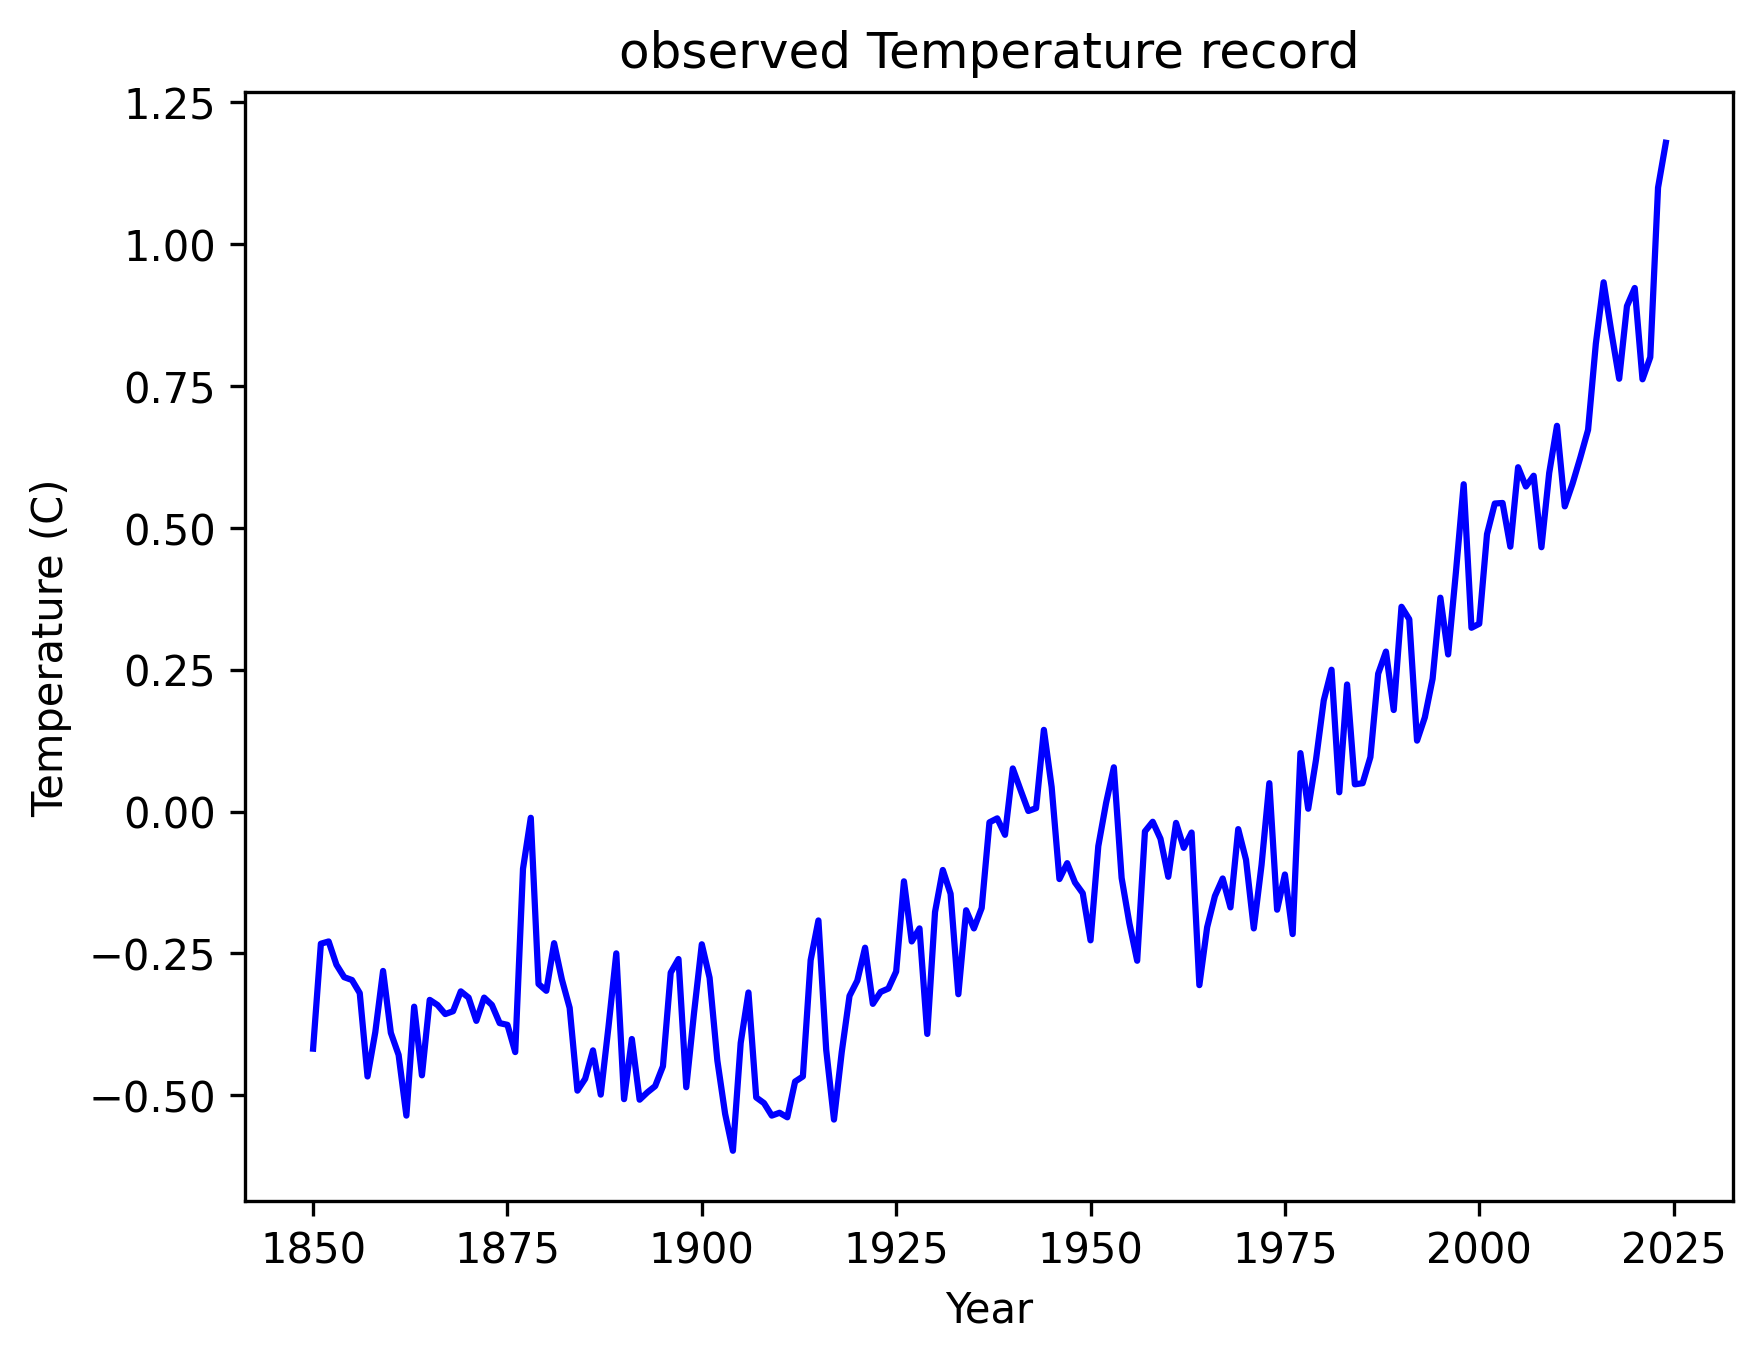

In [7]:
# plot it:
# --------
fig1= plt.figure(1,dpi=300)
# python array indices are in square brackets and start from zero:
plt.plot(T[:,0],T[:,1],color="b")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.title("observed Temperature record");

## <font color="red"> Exercise: line plot</font>
 <font color="red">
     plot $y(x)=\sin(x)$ for $x=-\pi$ to $\pi$.
   Hints: create an $x$ array (vector) using x=np.arange(-1,1.1,0.1), pi is given by np.pi, sine is given by np.sin()
</font>

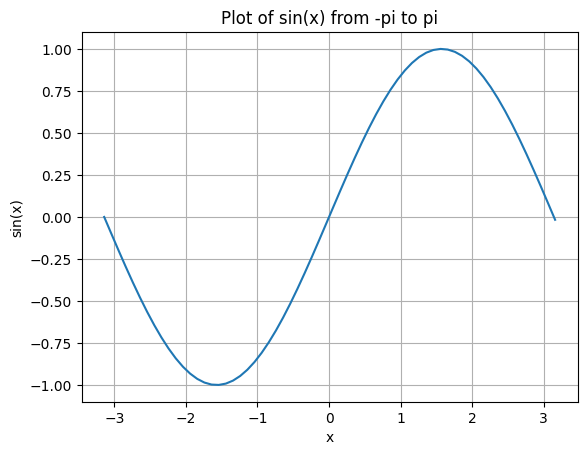

In [8]:
# code here:

x = np.arange(-np.pi, np.pi + 0.1, 0.1) # Adding a small value to include pi
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Plot of sin(x) from -pi to pi")
plt.grid(True)
plt.show()

## An if statement:

In [ ]:
# first a simple if statement, note again use of indentation to define end of statement:
if 2>1:
    print("yes, 2>1")
else:
    print("this will never be printed")


# find the warmest year using a combination of a loop and an if statement:
Tmax=-100
year_max=-100
# note the indentations denoting the blocks of the for loop and if statement:
for i in range(0,N):  # for loop starts here
    if T[i,1]>Tmax:   # if statement starts here
        Tmax=T[i,1]
        year_max=T[i,0] # this is the last line of both the for loop and the if statement

# note how the last element of the array may be referred to via a -1 index:
print("The first and last years are",T[0,0],T[-1,0])
print("The maximum temperature is", Tmax,", and it occured in year",year_max)

## <font color='red'> Exercise: for and if</font>
    
<font color='red'>write a for loop to calculate the root mean square of the temperature record using the formula
$$ rms(T)=\sqrt{\frac1N\sum_i T_i^2}$$
and then use an if statement to test if the rms is larger than the difference between the temperature at the end and the temperature at the beginning of the series, and print an appropriate message within the if statement:

if $rms(T)>(T_{last}-T_{first})$ <br>
&nbsp;&nbsp;&nbsp;   print a message that the rms is larger than the difference<br>
else<br>
&nbsp;&nbsp;&nbsp;   print a message that the rms is smaller<br>
</font>

In [ ]:
# insert your code below:

N=len(T[:,1])
myrms=0.0
for i in XX:
    myrms=myrms+XX
myrms=np.sqrt(myrms/N)

if XX:
    print XX
else:
    print XX


## Plotting two time series on the same axes using 2 $y$-axes

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('CO$_2$', color=color)
ax1.plot(CO2[:,0], CO2[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(T[:,0],T[:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# <font color="red">Exercise: Plotting two time series on the same axes using 2 $y$-axes<>/font

insert a code cell below this point, and plot sine(x) and 5cos(x) from $x=0$ to $x=2\pi$

XX insert a code cell below this point.

## Getting help from chatGPT

#### (a) Provide the following instruction to chatGPT, copy paste the resulting code into a new code cell below, test the code and adjust it as needed to make it work.

XX

write a python code to create two numpy arrays with x going from -pi to +pi and y=3*exp(-x)*cos(x). plot y as a function of x using matplotlib. save the result to a pdf file named myfigureoutput.pdf.

#### (b) Ask chatGPT to correct the following buggy code, replace the code with the corrected one and make sure it runs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XX

x=np.arange(-2*pi,pi,0.1)
f=cos(x)
plt.figure(1)
plt.clf()
plt.plot(x,f)
# always label axes and provide titles:
plt.xlabel('x')
plt.ylable("f')
plt.title('f(x)=cos(3x)')
plt.show()

## Using a built-in python function to calculate correlation

In [ ]:
# remove mean from each time series using np.mean():
X=T[:,1]-XX
Y=CO2[:,1]-XX

R=np.corrcoef(X,Y)

print("correlation calculated by np.corrcoef is:\n",R)

## Writing a python function that calculates correlation

using the formula:
$R=\frac{\sum X_iY_i}{\sqrt{\sum X_i^2}\sqrt{\sum Y_i^2}}$

(note how the documentation cells can include equations!)

In [ ]:
# here is how one defines a function:
def my_calc_correlation(X,Y):
    A=0
    B=0
    C=0
    for i in range(0,len(X)):
        A=A+X[i]*Y[i]
        B=B+X[i]*X[i]
        C=C+Y[i]*Y[i]
    R=A/(np.sqrt(B)*np.sqrt(C))
    return R

# and now we can use this function as follows
# (we use the fact that the mean has been renoved from X,Y)
my_R=my_calc_correlation(X,Y)
print("correlation calculated by my function is:\n",my_R)

## <font color='red'> Exercise: writing a function and plotting</font>
    
<font color='red'>write a function that takes a time series $T_i$ and produces a smoothed version
$$ \overline{T}_i=0.25T_{i-1}+0.5T_{i}+0.25T_{i+1}$$
and then plot the two on the same axes (no need to add a second vertical axis in this case). Note that you cannot calculate the smoothed version for the first and last points, and the smoothed time series therefore has 2 less points than the original one.
</font>

In [ ]:
# insert your code here

def smooth_timeseries(d):
    d_smooth=np.zeros(len(d))
    for i in XX:
        d_smooth[i]=XX
    return d_smooth[1:(len(d)-1)] # return only the interior points

T_smooth=smooth_timeseries(XX)
time_axis=XX # take only interior points of time axis too, for plotting

# plot it:
# --------
fig1= plt.figure()
# python array indices are in square brackets and start from zero:
plt.plot(XX) # plot original time series
plt.plot(XX) # plot smoothed one
plt.xlabel(XX)
plt.ylabel(XX)
plt.title(XX);


## Other python data types:

We already covered numpy arrays, other important data types are:
* lists
* dictionaries
* tuples

In [ ]:
# create a list with the two data sets combined
# an empty list:
my_data_list=[]
my_data_list.append(T)
my_data_list.append(CO2)
print("length of list is:",len(my_data_list))
print("the type of the first element of the list (that is, the zeroth index) is:",type(my_data_list[0]))
print("shape of first element of the list is:",my_data_list[0].shape)
print("the [4:8,1] values from the first element of the list is:",my_data_list[0][4:8,1])

In [ ]:
# create a dictionary with the two data sets combined
# an empty dictionary:
my_data_dict={}
my_data_dict["Temperature"]=T
my_data_dict["Carbon-dioxide"]=CO2

print("keys in dictionary are:",my_data_dict.keys())
print("the first few elements of the first data set are:",my_data_dict["Temperature"][0:5,0:2])

## <font color='red'> Exercise: creating tuples and dictionaries</font>
    
<font color='red'>create a dictionary with two lists. one is the first 7 letters of the alphabet (as strings) with the key being the string 'letters'; the other the digits from 0 to 9 (as numbers), with the key being the string 'numbers'.
    
<font color='red'>then print the keys of the dictionary
    
<font color='red'>print the 2nd-6th elements (where the 1st element is zero-indexed) of the first list in the dictionary.
    
<font color='red'>write a code to sum the 3rd-8th elements in the second list and print the result
</font>

In [ ]:
# Code here:

XX

# some tricky stuff

### (1) Ranges in python do not include the last element!
Note that in the last example, when we specify a range to be 0:5,0:2, the printed output is a 5X2 rather than a 6X3 as one might expect. This is part of the python specification, as demonstrated by the following loop:

In [ ]:
for i in range(2,6,1):
    print(i)

### (2) Making a copy of a python variable without getting in trouble:
An assignment like
B=A does not create a new variable B whose value is equal to that of A, but creates a pointer to A. This can lead to troube. Here are the details.

In [ ]:
# consider an arrays,
A=np.array([2,3,4])
print("A=",A)
print("now set B using B=A:")
B=A
print("A=",A,",B=",B)
print("changing B using B[1]=17:")
B[1]=17
print("changes also A:")
print("A=",A,",B=",B)

# in order to avoid this, create B using, for example:
B=A*1

### <font color='red'> Exercise: using ranges and making copy of variables</font>
    
<font color='red'>(A) write a for loop that prints the numbers in the range -2 to 8<br>
    (B) duplicate the above example, replacing B=A with B=A*1 and verify that this creates an independent array that is not modified when A is.
</font>

In [ ]:
# insert your code here

XX

## <font color='red'> Mathematical preliminaries</font>

Be sure you are comfortable solving these, as this material will be used during the semester.

(1) what is the derivative with respect to $t$ of

(1a) $Ae^{\alpha t}$,
    
(1b) $A\sin(bt)$,
    
(2) Calculate the integral $\int_0^1 \cos(2t)$

(3) what is the solution to each of the two following basic differential equation problems,
\begin{align*}
  \frac{dx}{dt}&=\alpha x,\quad \text{with } x(0)=-3\\
  \frac{d^2x}{dt^2}&=-\omega^2 x,\quad \text{with } x(0)=-3, \text{ and } \frac{dx(0)}{dt}=0
\end{align*}</font>

## Your solution here:

1a XX

1b XX

2 XX

3 XX

<font color="blue">

### How to download a Jupyter notebook as a PDF:
In JupyterHub, go to File ->  Save and Export Notebook As... -> PDF

### Before downloading and submitting Jupyter notebook:
With the notebook active in JupyterHub go to Kernel -> "Restart Kernel" and "Run All Cells." This ensures that the code output is up-to-date with what you have written in each cell.

# <font color=green> Writing assignment for first class: </font>
## Due next week with this Jupyter notebook, see guidelines in
https://courses.seas.harvard.edu/climate/eli/Courses/EPS101/Sources/Introduction/1st-class-writing-assignment.pdf

## My Equation
<font color="green">This is an equation: </font><font color="blue">$E=mc^2$</font>

XX insert new markdown cell below this point.